<class 'dict'>
2023-09-24
2023-09-27
https://minfin.com.ua/currency/2023-09-24
https://minfin.com.ua/currency/2023-09-25
https://minfin.com.ua/currency/2023-09-26
{'USD_value': [38.425, 38.3, 38.3], 'EUR_value': [41.3, 41.2, 41.15], 'PLN_value': [8.85, 8.94, 8.89], 'GBP_value': [47.525, 47.7, 47.5], 'CHF_value': [42.65, 42.5, 42.5], 'start_date': '24-09-2023', 'end_date': '27-09-2023'}
[38.425, 38.3, 38.3]
Курс валют від  24-09-2023  до  27-09-2023
USD-CURS  [38.425, 38.3, 38.3]
EUR-CURS  [41.3, 41.2, 41.15]
PLN-CURS  [8.85, 8.94, 8.89]
GBP-CURS  [47.525, 47.7, 47.5]
CHF-CURS  [42.65, 42.5, 42.5]
[47.58749999999998, 47.575, 47.562500000000036, 47.55000000000007]


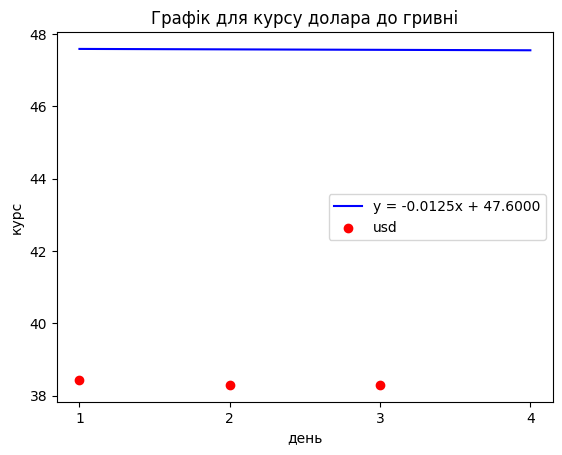

Прогноз USD:: 47.55
[47.58749999999998, 47.575, 47.562500000000036, 47.55000000000007]


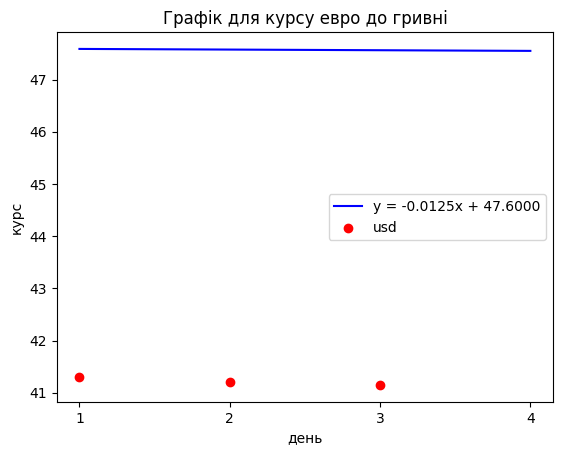

Прогноз EUR:: 47.55
[47.58749999999998, 47.575, 47.562500000000036, 47.55000000000007]


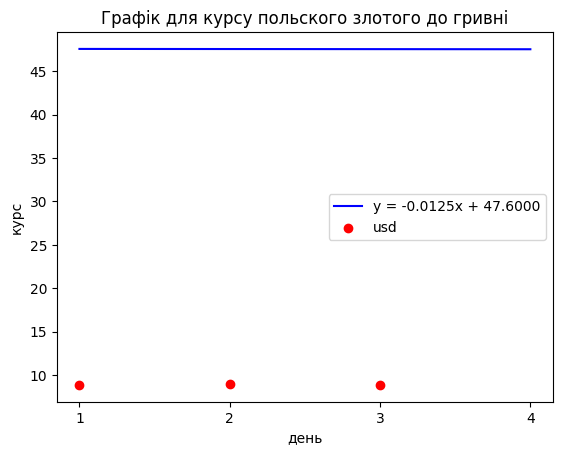

Прогноз PLN:: 47.55
[47.58749999999998, 47.575, 47.562500000000036, 47.55000000000007]


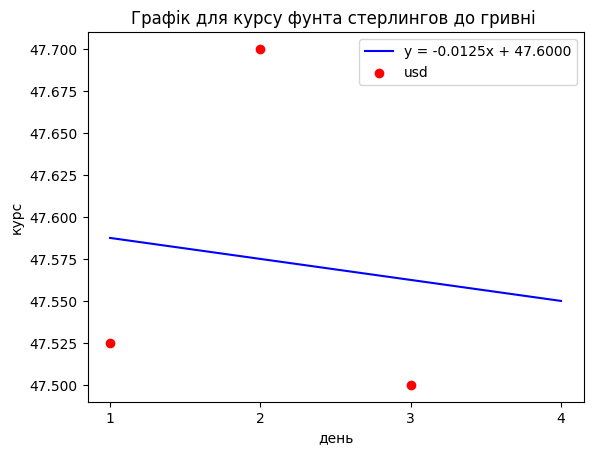

Прогноз GBP:: 47.55
[47.58749999999998, 47.575, 47.562500000000036, 47.55000000000007]


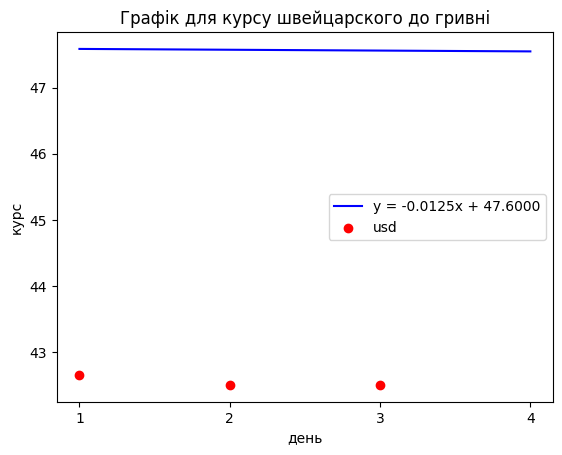

Прогноз CHF:: 47.55


In [2]:
import requests
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import json
import matplotlib.pyplot as plt

def f(x):
    s, s2 = 0, 0
    c = 0
    c1 = 0
    n = len(x)
    for i in range(n):
        c += (i + 1) * x[i]
        c1 += x[i]
        s += i + 1
        s2 += (i + 1) ** 2
    d = s2 * n - s * s
    dk = c * n - c1 * s
    db = s2 * c1 - c * s
    k = dk / d
    b = db / d
    return k, b


def printGrafKurs(x_for_func, x_axis, arrayCurs, title, message ):
    curs_k, curs_b = f(data["GBP_value"])
    usd_y_function = [curs_k * xi + curs_b for xi in x_for_func] 
    print(usd_y_function)
    plt.plot(x_for_func, usd_y_function, label=f'y = {curs_k:.4f}x + {curs_b:.4f}', color='blue')
    plt.title(title)
    plt.scatter(x_axis, arrayCurs, color='red', label='usd')
    plt.xticks(range(min(x_axis), max(x_axis) + 2))
    plt.xlabel('день')
    plt.ylabel('курс')
    plt.legend()
    plt.show()

    usd_prediction = curs_k * (len(usd) + 1) + curs_b
    # print(message  + " " + str({usd_prediction.2f}))
    print(f"{message}: {usd_prediction:.2f}")


def divideTheTerm(text):
    # Розділяє строку формату 28,27500.03 або 28,2750-0.03 розділити строку на частини 28,2750 і -0.03
    index = text.find(".")
    part1 = ""
    if text[index-2] == '-':
        part1 = text[0:index-2]
    else:
        part1 = text[0:index-1]
    part1 = float(part1.replace(",","."))

    return part1



# DOLLAR_UA = 'https://www.google.com/search?q=курс+доллара+в+украине&sca_esv=568226998&sxsrf=AM9HkKmCjQHil05bXgc-IXS8VdsqPkX8lQ%3A1695661728210&ei=oL4RZeHCDIbpkgXHk6CwAw&oq=курс+доллара+&gs_lp=Egxnd3Mtd2l6LXNlcnAiGNC60YPRgNGBINC00L7Qu9C70LDRgNCwICoCCAIyBxAAGIoFGEMyBRAAGIAEMgoQABiABBgUGIcCMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABDIFEAAYgAQyBRAAGIAEMgUQABiABEiUlhBQ0LYPWPz6D3ABeAGQAQCYAbgBoAG4A6oBAzMuMbgBA8gBAPgBAcICChAAGEcY1gQYsAPCAgoQABiKBRiwAxhDwgIHECMYigUYJ8ICDBAjGIoFGCcYRhiCAuIDBBgAIEGIBgGQBgo&sclient=gws-wiz-serp&bshm=rime/1'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36'
}

slovar = {
        "USD_value":[],
        "EUR_value":[],
        "PLN_value":[],
        "GBP_value":[],
        "CHF_value":[]
        }
date1 = '24-09-2023'
date2 = '27-09-2023'
print(type(slovar))
# date1, date2 = input("Enter the start and end date in the format dd-mm-yyyy dd-mm-yyyy :").split()

start_date = datetime.strptime(date1, '%d-%m-%Y').date()
end_date = datetime.strptime(date2, '%d-%m-%Y').date()
slovar["start_date"] = str(date1)
slovar["end_date"] = str(date2)
print(start_date)
print(end_date)

try:
    with open("currency_minfin.txt", "w") as file:
        while start_date != end_date:
            url = 'https://minfin.com.ua/currency/' + str(start_date.strftime("%Y-%m-%d"))
            print(url)
            full_page = requests.get(url, headers)
            # print(full_page.content)
            soup =BeautifulSoup(full_page.content, 'html.parser')

            # tr = soup.find_all( "tr", {"class":"sc-1x32wa2-4", "class":"dKDsVV"}, limit=5)
            nameValuta = soup.css.select(".bvp3d3-9.FqORR tbody  tr td a", limit=5)
            value = soup.css.select(".bvp3d3-9.FqORR tbody  tr td  .sc-1x32wa2-9.bKmKjX", limit=15)
            # nameValuta = soup.findAll("a",{"class":"sc-1x32wa2-7", "class":"ciClTw"}, limit=5)
            # nameValuta = soup.findAll("a",{"class":"sc-1x32wa2-7", "class":"ciClTw"})
            # print(len(nameValuta))
            # print(nameValuta)

        
            counter = 1
            for e in nameValuta:
                text = value[counter].text
                part1 = divideTheTerm(text)
                counter += 3
                slovar[e.text+"_value"].append(part1)
            start_date += timedelta(days=1)
            # time.sleep(1)
        json.dump(slovar, file, indent=3)
        file.close()

except Exception as e:
            print(f"Сталася помилка: {str(e)}")
            
print(slovar)




try:
    
    with open("currency_minfin.txt", "r") as file:
        data = json.load(file)
    file.close()

    print(data["USD_value"])
    print("Курс валют від  " + data["start_date"] + "  до  " + data["end_date"])
    print("USD-CURS  "+ str(data["USD_value"]))
    print("EUR-CURS  "+ str(data["EUR_value"]))
    print("PLN-CURS  "+ str(data["PLN_value"]))
    print("GBP-CURS  "+ str(data["GBP_value"]))
    print("CHF-CURS  "+ str(data["CHF_value"]))

    usd = data["USD_value"]
    eur = data["EUR_value"]
    pln = data["PLN_value"]
    gbp = data["GBP_value"]
    chf = data["CHF_value"]
   
    x_axis  = list(range(1, len(usd) + 1))
    x_for_func = list(range(1, len(usd) + 2))  

    printGrafKurs(x_for_func, x_axis, usd, "Графік для курсу долара до гривні", "Прогноз USD:")
    printGrafKurs(x_for_func, x_axis, eur, "Графік для курсу eвро до гривні", "Прогноз EUR:")
    printGrafKurs(x_for_func, x_axis, pln, "Графік для курсу польского злотого до гривні", "Прогноз PLN:")
    printGrafKurs(x_for_func, x_axis, gbp, "Графік для курсу фунта стерлингов до гривні ", "Прогноз GBP:")
    printGrafKurs(x_for_func, x_axis, chf, "Графік для курсу швейцарского до гривні", "Прогноз CHF:")

except Exception as e:
            print(f"Сталася помилкаaa: {str(e)}")








